In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd

## train_df

In [2]:
comp_dir = "/kaggle/input/hms-harmful-brain-activity-classification/"
train_df_path = os.path.join(comp_dir, "train.csv")
train_df = pd.read_csv(train_df_path)

In [3]:
vote_cols = [col for col in train_df.columns if "vote" in col]
print(vote_cols)
train_df["vote_num"] = train_df[vote_cols].sum(axis=1)

['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


array([[<Axes: title={'center': 'seizure_vote'}>,
        <Axes: title={'center': 'lpd_vote'}>],
       [<Axes: title={'center': 'gpd_vote'}>,
        <Axes: title={'center': 'lrda_vote'}>],
       [<Axes: title={'center': 'grda_vote'}>,
        <Axes: title={'center': 'other_vote'}>]], dtype=object)

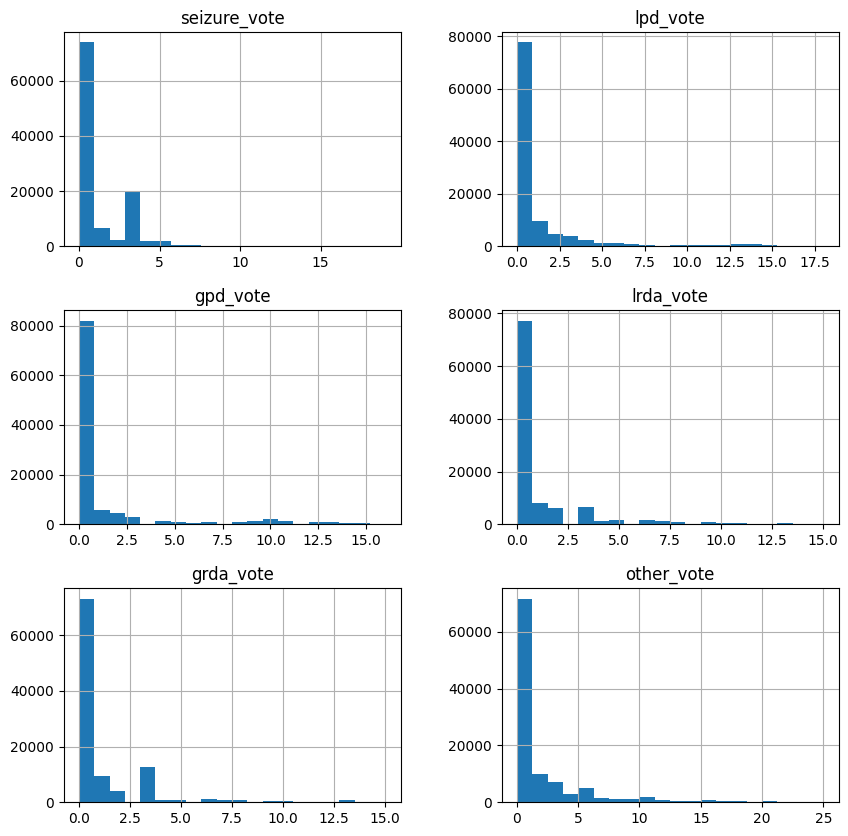

In [5]:
train_df[vote_cols].hist(bins=20, figsize=(10, 10))

<Axes: >

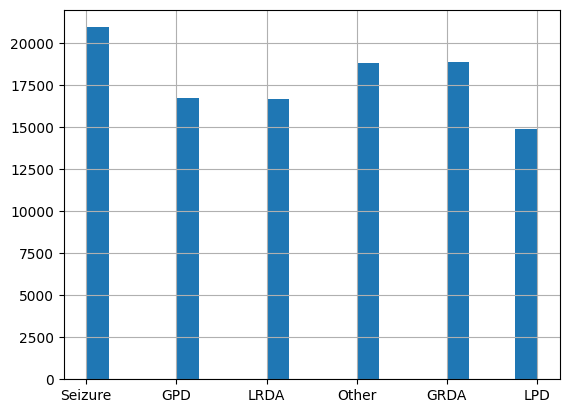

In [8]:
train_df["expert_consensus"].hist(bins=20)

# reliable data

In [18]:
reliable_path = os.path.join(comp_dir, "reliable_votes.csv")
reliable_df = pd.read_csv(reliable_path)

array([[<Axes: title={'center': 'seizure_vote'}>,
        <Axes: title={'center': 'lpd_vote'}>],
       [<Axes: title={'center': 'gpd_vote'}>,
        <Axes: title={'center': 'lrda_vote'}>],
       [<Axes: title={'center': 'grda_vote'}>,
        <Axes: title={'center': 'other_vote'}>]], dtype=object)

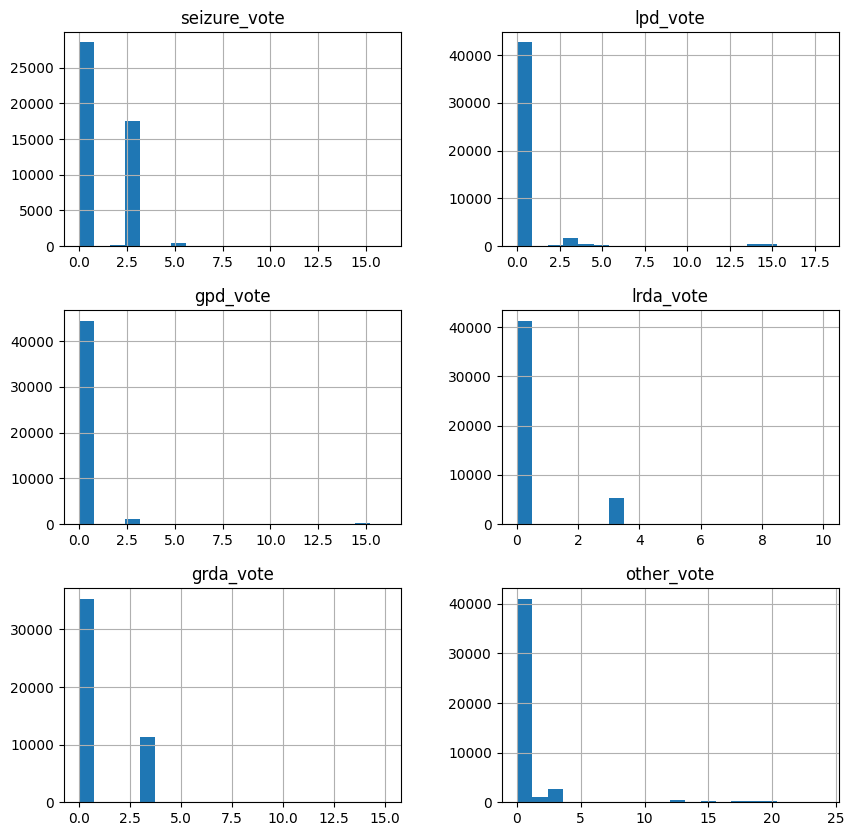

In [19]:
reliable_df[vote_cols].hist(bins=20, figsize=(10, 10))

<Axes: >

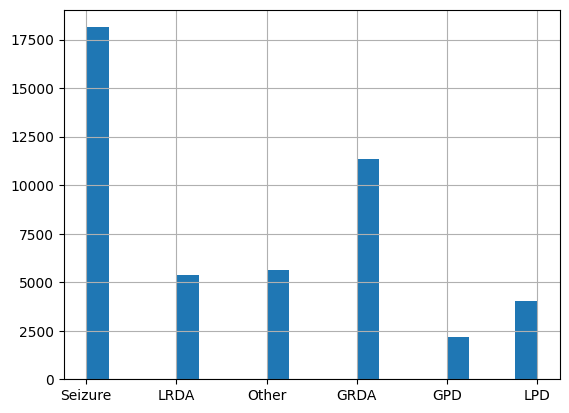

In [20]:
reliable_df["expert_consensus"].hist(bins=20)

# reliable with over10 data

In [22]:
reliable_over10_path = os.path.join(comp_dir, "reliable_votes_withover10.csv")
reliable_over10_df = pd.read_csv(reliable_over10_path)

array([[<Axes: title={'center': 'seizure_vote'}>,
        <Axes: title={'center': 'lpd_vote'}>],
       [<Axes: title={'center': 'gpd_vote'}>,
        <Axes: title={'center': 'lrda_vote'}>],
       [<Axes: title={'center': 'grda_vote'}>,
        <Axes: title={'center': 'other_vote'}>]], dtype=object)

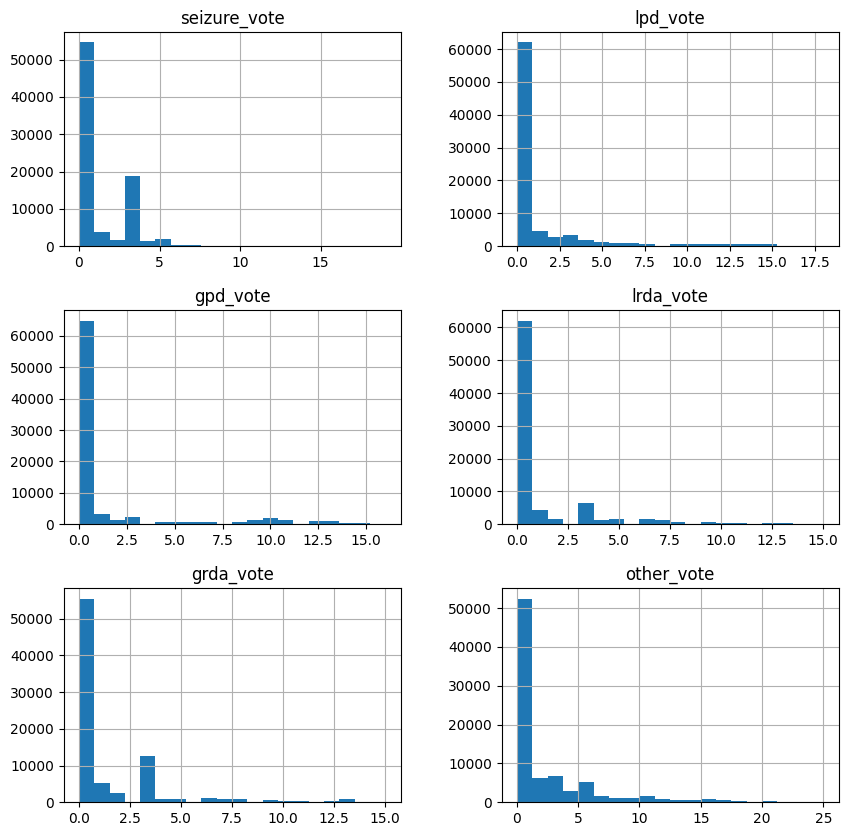

In [23]:
reliable_over10_df[vote_cols].hist(bins=20, figsize=(10, 10))

<Axes: >

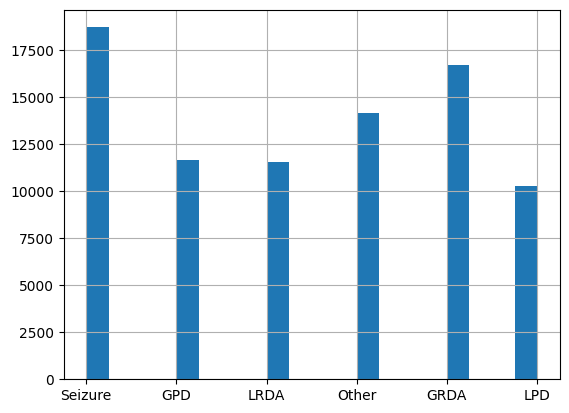

In [24]:
reliable_over10_df["expert_consensus"].hist(bins=20)

# oof

In [9]:
output_dir = "/kaggle/working/"
exp_name = "exp001_notrepeat_inputs_reliablewithover10_votes_scorefixed_BCE"
oof_path = os.path.join(output_dir, f"{exp_name}/tf_efficientnet_b0_ns_oof_df_{exp_name}_stage1.csv")

oof_df = pd.read_csv(oof_path)

In [15]:
# pred_seizure_vote, pred_lpd_vote, pred_gpd_vote, pred_lrda_vote, pred_grda_vote, pred_other_voteから
# 一番大きいvoteを選んでpred_consensusを作る
vote_pred_cols = [col for col in oof_df.columns if "vote" in col]
oof_df["pred_consensus"] = oof_df[vote_pred_cols].idxmax(axis=1).str.replace("pred_", "").str.replace("_vote", "")
# 大文字にする
oof_df["pred_consensus"] = oof_df["pred_consensus"].str.upper()


<Axes: >

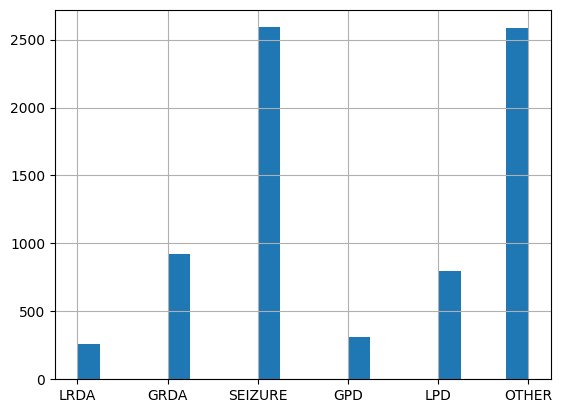

In [17]:
oof_df["pred_consensus"].hist(bins=20)

array([[<Axes: title={'center': 'pred_seizure_vote'}>,
        <Axes: title={'center': 'pred_lpd_vote'}>],
       [<Axes: title={'center': 'pred_gpd_vote'}>,
        <Axes: title={'center': 'pred_lrda_vote'}>],
       [<Axes: title={'center': 'pred_grda_vote'}>,
        <Axes: title={'center': 'pred_other_vote'}>]], dtype=object)

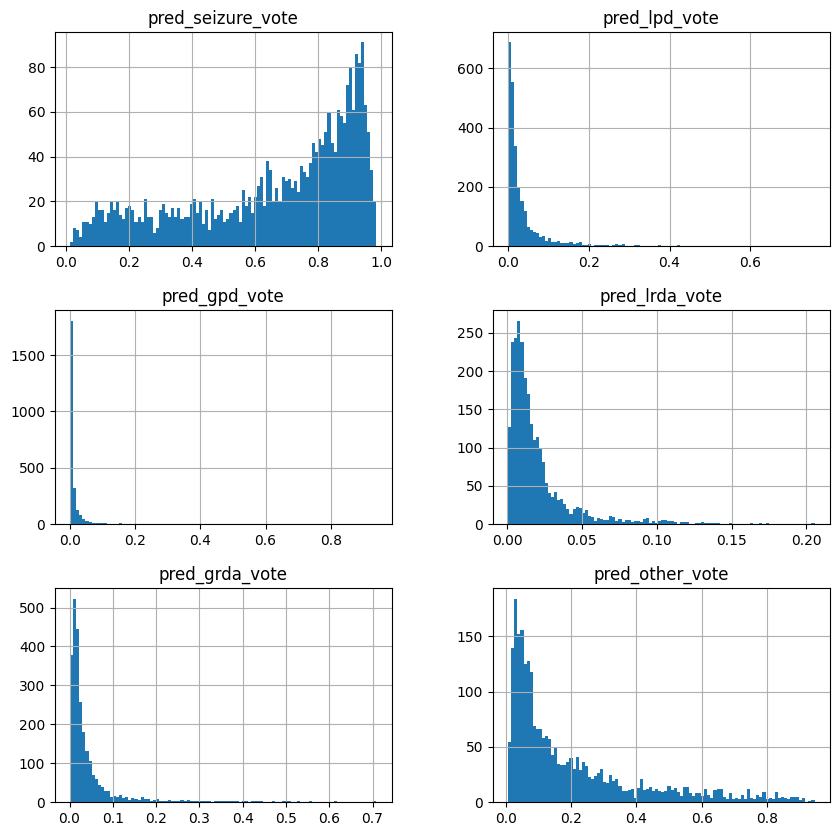

In [27]:
pred_seizure_df = oof_df[oof_df["pred_consensus"] == "SEIZURE"]
pred_cols = [col for col in pred_seizure_df.columns if "pred_" in col]
pred_seizure_df[pred_cols].hist(bins=100, figsize=(10, 10))